In [1]:
import matplotlib.pyplot as plt
import numpy as np

print("All modules are imported successfully.")

All modules are imported successfully.


In [2]:
# Initial parameters
k_true = 7
b_true = 0
N = 10000

# Generate values for x
x = np.linspace(0, 10, N)

# Add noise
noise = np.random.normal(0, 4, N)
y = k_true * x + b_true + noise

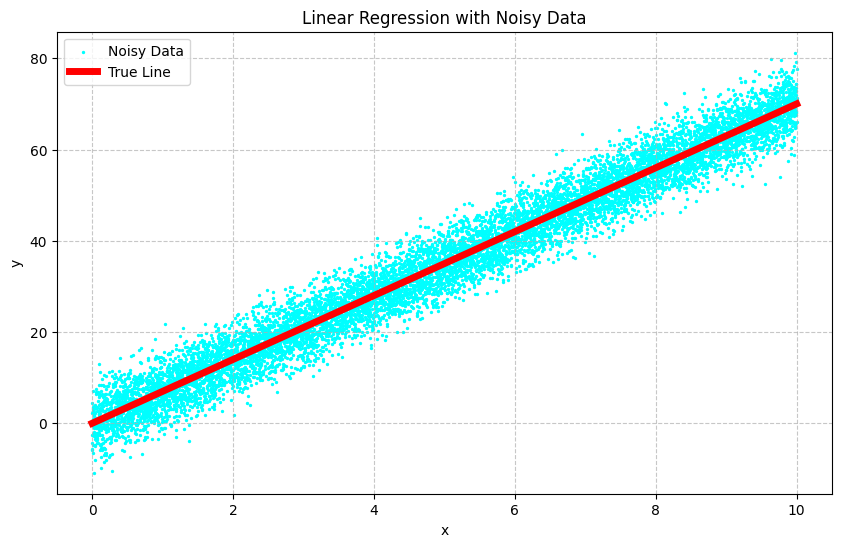

In [3]:
# Scatter plot with noise
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Noisy Data', color='cyan', s=2)
plt.plot(x, k_true * x + b_true, color='red', label='True Line', linewidth=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Noisy Data')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [4]:
def least_squares_method(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_xx = np.sum(x * x)
    
    k_hat = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    b_hat = (sum_y - k_hat * sum_x) / n
    
    return k_hat, b_hat

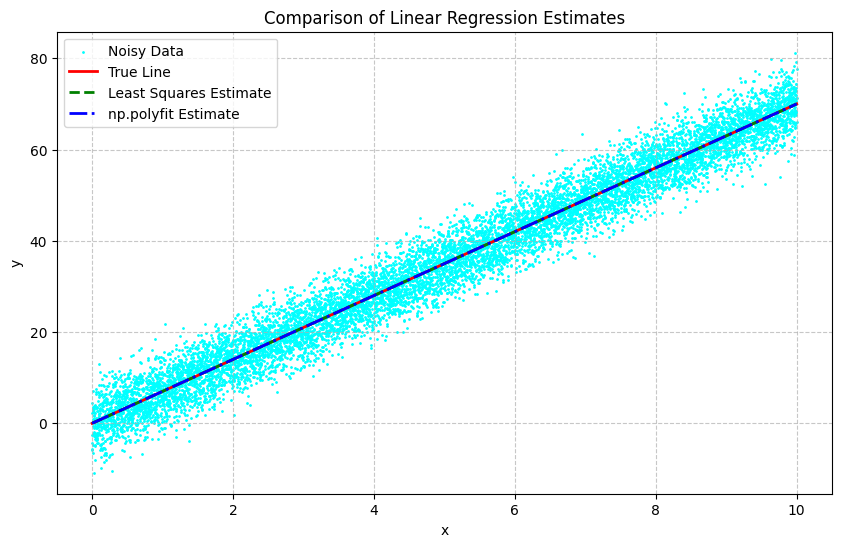

In [5]:
k_hat, b_hat = least_squares_method(x, y)

coefficients = np.polyfit(x, y, 1)
k_np_polyfit = coefficients[0]
b_np_polyfit = coefficients[1]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Noisy Data', color='cyan', s=1)
plt.plot(x, k_true * x + b_true, color='red', label='True Line', linewidth=2)
plt.plot(x, k_hat * x + b_hat, color='green', linestyle='--', label='Least Squares Estimate', linewidth=2)
plt.plot(x, k_np_polyfit * x + b_np_polyfit, color='blue', linestyle='-.', label='np.polyfit Estimate', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Linear Regression Estimates')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [6]:
print("True line parameters:")
print("k =", k_true)
print("b =", b_true)
print()
print("Least squares estimate parameters:")
print("k_hat =", k_hat)
print("b_hat =", b_hat)
print()
print("np.polyfit estimate parameters:")
print("k_np_polyfit =", k_np_polyfit)
print("b_np_polyfit =", b_np_polyfit)

True line parameters:
k = 7
b = 0

Least squares estimate parameters:
k_hat = 6.998784116985604
b_hat = 0.0036373291848925873

np.polyfit estimate parameters:
k_np_polyfit = 6.998784116985601
b_np_polyfit = 0.0036373291848957527


In [7]:
def gradient_descent(x, y, learning_rate, n_iter):
    k_hat = np.random.rand()
    b_hat = np.random.rand()
    n = len(x)
    
    for _ in range(n_iter):
        y_pred = k_hat * x + b_hat
        gradient_k = (-2/n) * np.sum(x * (y - y_pred))
        gradient_b = (-2/n) * np.sum(y - y_pred)

        k_hat -= learning_rate * gradient_k
        b_hat -= learning_rate * gradient_b
    
    return k_hat, b_hat

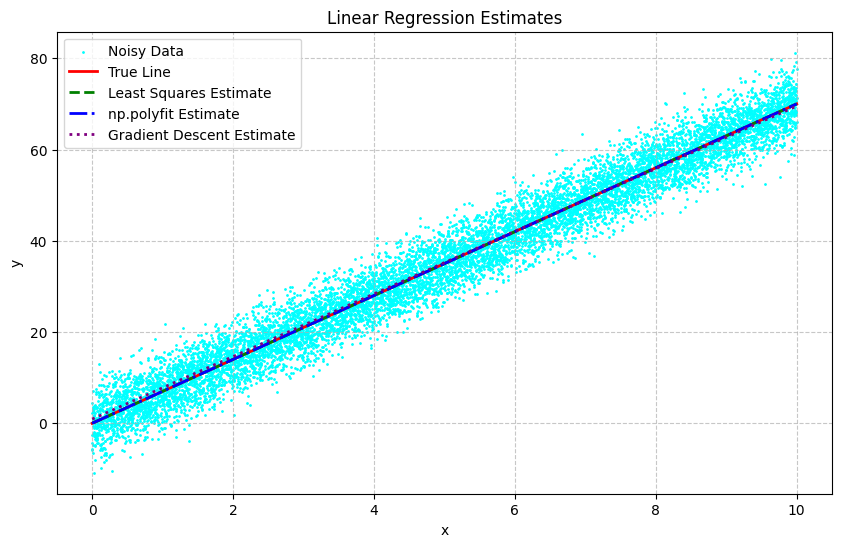

In [8]:
learning_rate = 0.01
n_iter = 100

k_gradient, b_gradient = gradient_descent(x, y, learning_rate, n_iter)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Noisy Data', color='cyan', s=1)
plt.plot(x, k_true * x + b_true, color='red', label='True Line', linewidth=2)
plt.plot(x, k_hat * x + b_hat, color='green', linestyle='--', label='Least Squares Estimate', linewidth=2)
plt.plot(x, k_np_polyfit * x + b_np_polyfit, color='blue', linestyle='-.', label='np.polyfit Estimate', linewidth=2)
plt.plot(x, k_gradient * x + b_gradient, color='purple', linestyle=':', label='Gradient Descent Estimate', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Estimates')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [9]:
def loss_function(x, y, k, b):
    y_pred = k * x + b
    return np.mean((y_pred - y) ** 2)

errors = []
iterations = range(1, n_iter + 1)
for i in iterations:
    k_gradient, b_gradient = gradient_descent(x, y, learning_rate, i)
    error = loss_function(x, y, k_gradient, b_gradient)
    errors.append(error)


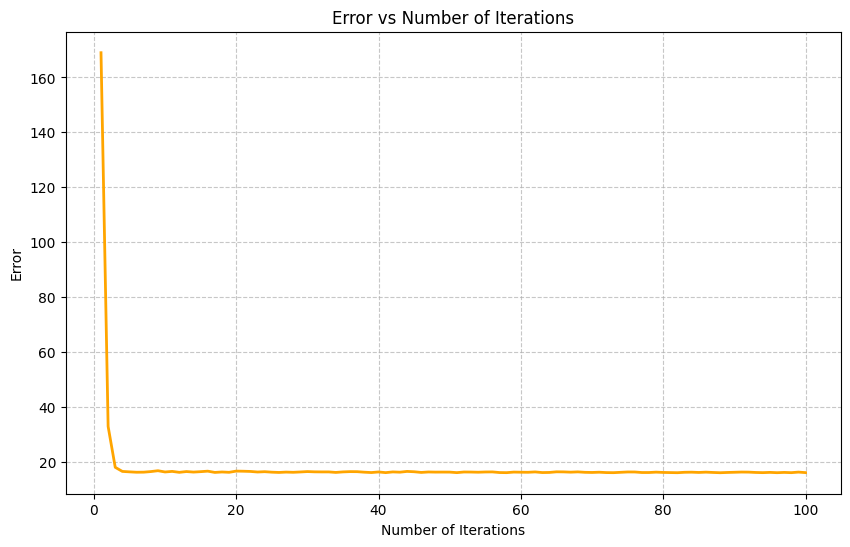

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, errors, color='orange', linewidth=2)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error vs Number of Iterations')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()